<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/main/Proyecto_3_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto III: Sistema de recomendación de Peliculas

#### Integrantes: Santiago Alvarez Barbosa y Esteban Hernandez

Se busca diseñar un sistema de recomendación de peliculas, utilicen su conocimiento de diferentes técnicas de aprendizaje no supervisado para diseñarlo.

Pueden usar la base de datos de ratings de peliculas, la descripción pueden encontrala [aquí](https://grouplens.org/datasets/movielens/100k/), y los archivos estan adjuntos en la carpeta del taller. Esta base de datos cuenta con la calificación de 943 usuarios a 1682 peliculas, en total se dispone de 1000 mil calificaciones (entre 0 y 5). Ademas de la lista que relaciona al usuario con la pelicula y el rating dado, usted cuenta con información sobre el genero al que pertenece la pelicula (una clasificación de 19 generos diferentes, asi mismo como información relacionada con edad, sexo, y profesion de los diferentes usuarios.

Se busca evaluar el uso de diferentes tecnicas de aprendizaje no supervisado. Por lo tanto se deben emplear diferentes técnicas de las vistas en clase. Para este proyecto usted cuenta con la siguiente información en diferentes archivos de excel:

1. **u_data_ratings.xls**: rating de peliculas asignado por un usuario a una pelicula especifica.
2. **u_movies_genre.xls**: enumeración de los 20 diferentes generos de peliculas incluidos en la base de datos.
3. **u_movies_items.xls**: un archivo que contiene información relacionada con cada una de las peliculas.
5. **u_user_info.xls**: información relacionada a los usuarios.

Para el desarrollo de este ejercicio usted debe:

1. Desarrollar un sistema de recomendación de peliculas basado en la información proporcionada.
2. Realizar un analisis y descripción de la información presentada utilizando herramientas de aprendizaje no supervisado. Que puede decir de los datos y su distribución?, que grupos pueden encontrar?, que indican esos grupos?

Entregas

1. [Analisis de la información presentada. Que se puede inferir de los datos?](#datos)
2. [Implementación y explicación del sistema de recomendación. Analisis de los resultados del sistema de recomendación utilizando un ejemplo.](#recom)
3. [Como puedo evaluar que peliculas le podrian gustar a un usuario nuevo (que no este en la base de datos) basado en las calificaciones que este da a una serie de peliculas?](#new_user)
4. [Analisis sobre como incorporar toda la información otorgada.](#info)
5. [¿Que se puede inferir sobre los diferentes usuarios y sus gustos en peliculas? se puede encontrar alguna relación entre edad, profesion, sexo y genero de pelicuals que les gusta a estos grupos? Como se podria obtener esta información.](#pref)
6. Durante el desarrollo de cada uno de los puntos del taller indique los metodos utilizados y explique la forma como los utiliza.
7. [Una discusión sobre el desarrollo del proyecto, los metodos utilizados, posibles mejoras, etc..](#dis)


Deben entregar el notebook de jupyter con el material de apoyo necesario, el código documentado con el análisis de cada una de las partes, y las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Nombre1__Apellido1_No_Supervisado.




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Data Preprocessing <a class="anchor" id="datos"></a>

Primero importamos las librerias y modulos necesarios para el desarrollo de es este proyecto. Adicionalmente se indica la funcionalidad de cada una.

In [ ]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 26.1 MB/s 


In [ ]:
pip install --upgrade xlrd 

     |████████████████████████████████| 96 kB 5.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
#Para la visualizion y manipulacion de los datos 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Funcionamiento asociado al Aprendizaje de Máquina No Supervisado 
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

#Para el sistema de recomendacion
import random

Lo siguiente es importar los varios datos de las películas que se encuentra en la carpeta *datos*. Además de importar los archivos excel que contienen la inforamción, limpiamos y preprocesamos los datos para facilitar su entendimiento.

In [ ]:
# Definimos el de cada archivo excel que contiene los datos 
ratings_path = '/content/u_data_ratings.xls'
genre_path = '/content/u_movies_genre.xls'
movies_path = '/content/u_movies_items.xls'
occupations_path  = '/content/u_occupation.xls'
users_path    = '/content/u_user_info.xls'

In [ ]:
#Importación del archivo u_data_ratings.xls 
ratings = pd.read_excel(ratings_path, names=['User ID', 'Item ID', 'Ratings', 'Timestamp'])
ratings.drop(columns=['Timestamp'], inplace=True)

#Importación del archivo u_movies_genre.xls 
genre = pd.read_excel(genre_path,header=None, names=['Genre', 'Genre ID'])
genre.drop(columns=['Genre ID'], inplace=True)
genre.replace("unknown", "Unknown", inplace=True)

#Importación y limpieza del archivo u_movies_items.xls 
movies = pd.read_excel(movies_path,header=None, names=["Movie ID", "Movie Title", "Release Date", "Video Release Date", "IMDb URL", "Unknown", "Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"])
movies.drop(columns=['Video Release Date','IMDb URL','Release Date'], inplace=True)
movies.dropna(inplace=True)
movies.index = movies.index + 1

#Importación del archivo u_occupation.xls
occupations = pd.read_excel(occupations_path,header=None, names=["Occupation"])

#Importación del archivo u_user_info.xls
users = pd.read_excel(users_path,header=None, names=["User Id", "Age", "Gender", "Occupation", "Zip Code"])
users.index = users.index + 1

La limpieza de los archivos consistió en eliminar ciertas caracteristicas debido a que o no tienen inforamción o consideramos que no son relevantes para el desarrollo del proyecto. 
Habiendo hecho las respectivas importaciones y limpiezas de los datos, obtenemos las 5 tablas. 

In [ ]:
ratings.head()

,User ID,Item ID,Ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [ ]:
genre.head()

,Genre
0,Unknown
1,Action
2,Adventure
3,Animation
4,Children's


In [ ]:
movies.tail()

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1678,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1681,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1682,1682,Scream of Stone (Schrei aus Stein) (1991),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
occupations.head()

,Occupation
0,administrator
1,artist
2,doctor
3,educator
4,engineer


In [ ]:
users.head()

,User Id,Age,Gender,Occupation,Zip Code
1,1,24,M,technician,85711
2,2,53,F,other,94043
3,3,23,M,writer,32067
4,4,24,M,technician,43537
5,5,33,F,other,15213


A continaución analizaremos un poco la inforamción presente en las tablas para conseguir conocimeinto de dicha inforamción y poder hacer inferencia sobre los datos.

In [ ]:
ratings["Ratings"].describe()

count    65535.000000
mean         3.533883
std          1.130528
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Ratings, dtype: float64

In [ ]:
movies.iloc[:, 2:].apply(pd.Series.value_counts).drop([0], axis=0)

,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,2,251,135,42,122,505,109,50,725,22,24,92,56,61,247,101,251,71,27


In [ ]:
users["Age"].describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: Age, dtype: float64

In [ ]:
users["Occupation"].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: Occupation, dtype: int64

In [ ]:
users["Gender"].value_counts()

M    670
F    273
Name: Gender, dtype: int64

Con esto en cuenta podemos concluir lo siguiente: 
- Con respecto a los ratings, aunque sea de 0 a 5, el valor minimo es 1 mientras que el máximo es 5. Adicionalmente se puede vere que el puntaje promedio es 3.5.
- De los 18 géneros, los top 3 son 
    1. *Drama* con 725
    2. *Comedia* con 505
    3. *Accion* y *Thriller* con 251
- De los 18 géneros, omitiendo el género desconocido, *Fantasía* es el género con menos peliculas con solo 22.
- De los usuarios, la edad promedio es 34, la edad mínima es 7 y la máxima es 73. También se tiene que la mayoria de los usuarios son *estudiantes* y 71% de los usuarios son hombres.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Recomendation System Analysis <a class="anchor" id="recom"></a>

Para el sistema de recomendación de películas se implementará el metodo de aprendizaje no supervisado de *Hierarchical Clustering.* Este se usará para agrupar las peliculas mediante diferentes combinaciones de los diferentes géneros que representa

### Hierarchical Clustering

Recordemos que *Heirarchical Clustering* es un método que busca establecer una jerarquía para las agrupaciones mediante el análisis de disimilaridad con respecto a diferentes umbrales. 

Los resultados del clustering pueden verse con el uso de un dendograma, el cual es un diagrama de datos en forma de árbol donde las ramas representan la jerarquía de los datos. 

A continuación generamos el dendograma con respecto a la tabla de movies, ya que esta tiene la informacion de los géneros de cada película. Aunque los labels de las peliculas se omiten para tener una visualización más limpia del dendograma, recordemos que estamos agrupando películas:

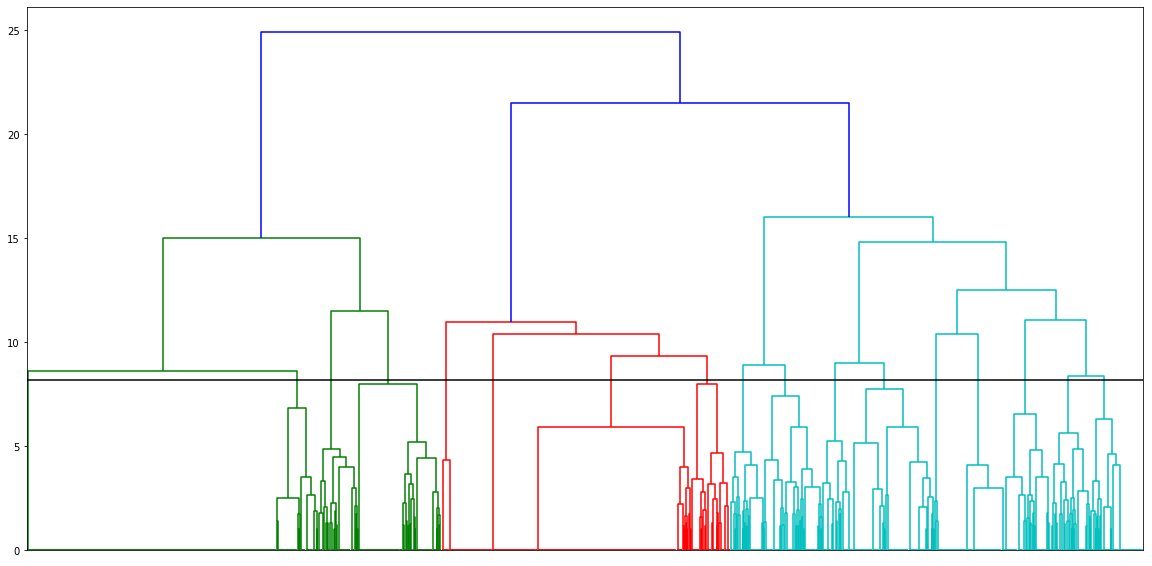

In [ ]:
# Generación del dendograma
lab = []
for i in range(len(movies.iloc[:,2:].index)):
    lab.append(" ")
X = sch.linkage(movies.iloc[:,2:], 'ward')
plt.figure(figsize=(20,10))
dendro = sch.dendrogram(X,labels=lab,orientation='top', leaf_rotation=90.)

# Definimos la altura 
height = 8.2

# Linea horizantal cuando altura = 10
plt.axhline(y=height, c='k')

Además de observar la similitud entre las películas, se puede identificar el número de clusters al hacer un corte horizontal a una altura determinada del dendograma.

Aunque la escogencia de la altura sea arbitraria, teniendo en cuenta el contexto del problema, no queremos un número de clusters muy pequeño porque esto haria que las recomendaciones no sean tan personalizadas ya que cada cluster tendria un alto número de películas, pero tampoco queremos muchos clusters de tal forma que haya pocas películas en cada uno y por ende no se pueda recomendar una alta variedad de películas.

Con esto en cuenta, consideramos que un buen número sería cortar el dendograma a la altura 8.2 y generar 17 clusters.

Entonces, a continuación agregamos los ratings promedio de cada pelicula, ya que esto será usado en el sistema de recomendación más adelante, e  identificamos el cluster de cada película.


In [ ]:
# Creamos un nuevo DataFrame que une a peliculas con los ratings
sorted_av_ratings = ratings.groupby(['Item ID'])[["Ratings"]].mean()
sorted_av_ratings

sorted_av_movie_ratings = pd.concat([movies, sorted_av_ratings], axis=1)
sorted_av_movie_ratings.insert(loc=2, column='Average Ratings', value=sorted_av_movie_ratings["Ratings"])
sorted_av_movie_ratings.drop('Ratings', inplace=True, axis=1)
sorted_av_movie_ratings.replace(np.nan, 0, inplace=True)
sorted_av_movie_ratings

,Movie ID,Movie Title,Average Ratings,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,1,Toy Story (1995),3.903654,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,GoldenEye (1995),3.089744,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,Four Rooms (1995),2.967742,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,Get Shorty (1995),3.614286,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,Copycat (1995),3.327869,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,1678,Mat' i syn (1997),0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,1679,B. Monkey (1998),0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,1680,Sliding Doors (1998),0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1681,1681,You So Crazy (1994),0.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Generación de Clusters 
clusters = sch.fcluster(X,t=height,criterion="distance")

# Agregamos una nueva columna
mclusters = sorted_av_movie_ratings.copy()
mclusters["Clusters"] = clusters
 
# Unicamente nos enfocamos en estos clusters, no en los generos
movie_clusters_explicit = mclusters.sort_values("Clusters")
movie_clusters = movie_clusters_explicit.iloc[:,[0,1,2,-1]]
movie_clusters

,Movie ID,Movie Title,Average Ratings,Clusters
1682,1682,Scream of Stone (Schrei aus Stein) (1991),0.000000,1
303,303,Ulee's Gold (1997),3.678161,1
1530,1530,Jefferson in Paris (1995),2.000000,1
1317,1317,"Journey of August King, The (1995)",2.500000,1
1532,1532,Foreign Student (1994),2.000000,1
...,...,...,...,...
943,943,Killing Zoe (1994),3.600000,17
1422,1422,Suture (1993),2.000000,17
156,156,Reservoir Dogs (1992),4.018018,17
788,788,Relative Fear (1994),1.000000,17


Veamos la cantidad de péliculas en cada cluster

In [ ]:
for i in range(1,movie_clusters["Clusters"].max()+1):
    print("Cantidad de películas en cluster", i, "es: ", len(movie_clusters[movie_clusters["Clusters"]==i]))

Cantidad de películas en cluster 1 es:  376
Cantidad de películas en cluster 2 es:  62
Cantidad de películas en cluster 3 es:  61
Cantidad de películas en cluster 4 es:  126
Cantidad de películas en cluster 5 es:  76
Cantidad de películas en cluster 6 es:  68
Cantidad de películas en cluster 7 es:  232
Cantidad de películas en cluster 8 es:  59
Cantidad de películas en cluster 9 es:  51
Cantidad de películas en cluster 10 es:  88
Cantidad de películas en cluster 11 es:  46
Cantidad de películas en cluster 12 es:  122
Cantidad de películas en cluster 13 es:  49
Cantidad de películas en cluster 14 es:  58
Cantidad de películas en cluster 15 es:  71
Cantidad de películas en cluster 16 es:  58
Cantidad de películas en cluster 17 es:  79


Como se puede evidenciar, cada cluster tiene relativamente un buen número de películas, donde el mínimo tiene 49 y el máximo 438. Entonces consideramos que escoger la altura que genera 17 clusters fue una decisión adecuada.

Ahora vamos a mirar cada cluster en detalle para determinar qué representa cada uno. Esto se hará identificando aquellos generos que predominan en cada cluster:

In [ ]:
mc1 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==1]
mc1 = mc1.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc2 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==2]
mc2 = mc2.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc3 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==3]
mc3 = mc3.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc4 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==4]
mc4 = mc4.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc5 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==5]
mc5 = mc5.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc6 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==6]
mc6 = mc6.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc7 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==7]
mc7 = mc7.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc8 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==8]
mc8 = mc8.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc9 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==9]
mc9 = mc9.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc10 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==10]
mc10 = mc10.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc11 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==11]
mc11 = mc11.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc12 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==12]
mc12 = mc12.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc13 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==13]
mc13 = mc13.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc14 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==14]
mc14 = mc14.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc15 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==15]
mc15 = mc15.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc16 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==16]
mc16 = mc16.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

mc17 = movie_clusters_explicit[movie_clusters_explicit["Clusters"]==17]
mc17 = mc17.iloc[:, 3:-1].apply(pd.Series.value_counts).drop([0], axis=0).replace(np.nan, 0)

In [ ]:
all_clusters = [mc1, mc2, mc3, mc4, mc5, mc6, mc7, mc8, mc9, mc10, mc11, mc12, mc13, mc14, mc15, mc16, mc17]
all_clusters_df = pd.concat(all_clusters )
all_clusters_df.reset_index(inplace=True)
all_clusters_df.index = all_clusters_df.index + 1
all_clusters_df.drop(columns=['index'], inplace=True) 
all_clusters_df

,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,26.0,2.0,0.0,0.0,0.0,7.0,0.0,62.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,44.0,0.0,0.0
3,0.0,12.0,3.0,1.0,1.0,10.0,0.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,12.0,3.0,5.0,61.0,1.0
4,0.0,21.0,13.0,0.0,1.0,2.0,2.0,0.0,74.0,0.0,1.0,2.0,0.0,0.0,126.0,3.0,13.0,4.0,0.0
5,0.0,0.0,0.0,0.0,0.0,76.0,0.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0
7,0.0,17.0,10.0,0.0,3.0,232.0,1.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
8,0.0,12.0,2.0,0.0,1.0,25.0,0.0,0.0,11.0,0.0,0.0,0.0,35.0,0.0,11.0,1.0,1.0,1.0,24.0
9,2.0,6.0,48.0,3.0,36.0,1.0,0.0,0.0,10.0,9.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,2.0
10,0.0,3.0,2.0,36.0,77.0,40.0,1.0,0.0,14.0,12.0,0.0,0.0,18.0,0.0,4.0,4.0,1.0,0.0,0.0


Al mirar los generos que contienen más peliculas en cada cluster generado, podemos nombrar los clusters de la siguiente manera:

- Cluster 1: **Dramas** 
- Cluster 2: **Dramatic Thrillers**
- Cluster 3: **Dramatic War Films** 
- Cluster 4: **Romantic Dramas**
- Cluster 5: **Dramatic Comedies**
- Cluster 6: **Romantic Comedies**
- Cluster 7: **Comedies**
- Cluster 8: **Western Musical Comedies** 
- Cluster 9: **Children's Adventure Movies**
- Cluster 10: **Children's Animation**
- Cluster 11: **SciFi Thrillers** 
- Cluster 12: **Action Thrillers**
- Cluster 13: **Documentaries**
- Cluster 14: **Horror Movies** 
- Cluster 15: **Crime Dramas**
- Cluster 16: **Mystery Thrillers**
- Cluster 17: **Crime Thrillers** 

Aunque en este clustering se agruparon películas similares, con esta inforamción también es posible recomendar películas a usuarios mediante el siguiente método:

1. Identificar las películas que le gusta al usuario. 
  - Definimos aquellas películas como las películas con rating más alto respecto al usuario (el rating más alto de un usuario puede ser 3, aunque el máximo rating posible sea 5).
2. Determinar el cluster de dichas peliculas y escoger aquel cluster que tiene la mayoría de las peliculas que le gusta al usuario. 
  - En el caso de haber un empate en el número de películas de clusters, se escoge el cluster que contiene la mayor cantidad de películas, para tener una gran cantidad para recomendaciones.
3. Por cada cluster, escoger aquellas peliculas que el usuario no ha visto. 
4. De esas películas, recomendar las 5 películas con promedio de rating más alto.

Con esto en cuenta, desarrollemos dicho método mediante la funcion *movie_recomendation*:

In [ ]:
def movie_recomendation(user):
    # Input: Usuario que se encuentra dentro de la base de datos
    # Output: Tabla de recomendación

    # Array que contiene los generos de cada cluster
    custom_genres = ["Dramas", "Dramatic Thrillers","Dramatic War Films", 
                     "Romantic Dramas","Dramatic Comedies","Romantic Comedies",
                     "Comedies","Western Musical Comedies", "Children's Adventure Movies",
                     "Children's Animation","SciFi Thrillers", "Action Thrillers",
                     "Documentaries","Horror Movies", "Crime Dramas",
                     "Mystery Thrillers","Crime Thrillers"]  

    # Array vacio que ayudará a desempates
    tiebreaker = []
    print("Nos enfocamos en el usuario:", user)
    
    #Primero identificamos las peliculas que le gusta al usuario
    user_spec_movies = ratings[ratings["User ID"]==user]
    user_movie_likes = user_spec_movies[user_spec_movies["Ratings"]>=user_spec_movies["Ratings"].max()]
    movie_like_id = user_movie_likes["Item ID"].to_list()

    #Determinamos los clusters de las peliculas y escogemos el que tenga el mayor número de peliculas que le gusta al usuario
    spec_movie_clusters = movie_clusters[movie_clusters["Movie ID"].isin(movie_like_id)]
    spec_movie_clusters["Clusters"].value_counts()
    preferred_cluster = spec_movie_clusters["Clusters"].mode().to_list()
    if len(preferred_cluster) > 1:
      for i in preferred_cluster:
        tiebreaker.append(len(movie_clusters[movie_clusters["Clusters"]==i]))
      max_value = max(tiebreaker)
      max_index = tiebreaker.index(max_value)
      preferred_cluster = preferred_cluster[max_index]
    else:
      preferred_cluster = preferred_cluster[0]
    print("Al usuario", user, "le gustan las películas que se encuentran en el cluster:", preferred_cluster, "Entonces le gustan:", custom_genres[preferred_cluster - 1] )
    
    # Identificamos las peliculas que el usuario 1 no ha visto 
    user_spec_ratings = ratings[ratings["User ID"]==user].sort_values("Item ID")
    user_seen_movies = user_spec_ratings["Item ID"].to_list()

    user_movies_not_seen = []
    for i in range(1,len(movies)):
        if i not in user_seen_movies:
            user_movies_not_seen.append(i)

    #Encontramos las peliculas que no haya visto en su cluster favorito 
    preferred_cluster_movies = movie_clusters[movie_clusters["Clusters"]==preferred_cluster]
    recomended_movies = preferred_cluster_movies[preferred_cluster_movies["Movie ID"].isin(user_movies_not_seen)]
    print("Nuestro modelo recomienda las siguientes 5 películas")
#     return recomended_movies.sort_values("Average Ratings",ascending=False).head(5)
    top_5 = recomended_movies.sort_values("Average Ratings",ascending=False).head(5)
    return top_5.iloc[:,:2]

Ahora probemos este sistema de recomendación con un usuario aleatorio que se encuentra en la base de datos.

In [ ]:
# Escogemos un usuario aleatorio
active_users = ratings["User ID"].to_list()
active_users = list(set(active_users))

movie_recomendation(random.choice(active_users))

Nos enfocamos en el usuario: 219
Al usuario 219 le gustan las películas que se encuentran en el cluster: 11 Entonces le gustan: SciFi Thrillers
Nuestro modelo recomienda las siguientes 5 películas


,Movie ID,Movie Title
183,183,Alien (1979)
429,429,"Day the Earth Stood Still, The (1951)"
96,96,Terminator 2: Judgment Day (1991)
171,171,Delicatessen (1991)
195,195,"Terminator, The (1984)"


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## New User Evaluation <a class="anchor" id="new_user"></a>

A continuación, definimos una función que genera usuarios "reales" de manera aleatoria: genera un usuario por **edad**, **género** y **ocupación**, y le asigna de manera aleatoria un máximo de 30 películas y una calificación entre 1 y 5 para cada una. Las edades, géneros, ocupaciones, Movie ID's y calificaciones se sacan de los dataframes de entrenamiento, por lo que cada usuario es en realidad una combinación aleatoria de columnas de los dataframes.

Estos son usuarios de prueba generados de manera automatizada, que simulan cómo sería la interacción de cualquier usuario real con el recomendador de películas.

In [ ]:
def generate_user(df_users, df_ratings, df_movies):
    User_Id = 10000

    row_user = [User_Id]
    for (index, column) in enumerate(df_users):
        if column != 'User Id':
            column = pd.DataFrame(df_users[column])
            row_user.append(column.sample(n=1).values.tolist()[0][0])
    df_user = pd.DataFrame(row_user).T
    df_user = df_user.set_axis(df_users.columns.tolist(), axis=1)

    rows = [] 
    for i in range(np.random.randint(1, 30)):   
        row_rating = [User_Id]
        for (index, column) in enumerate(df_ratings):
            if column != 'User ID':
                column = pd.DataFrame(df_ratings[column])
                row_rating.append(column.sample(n=1).values.tolist()[0][0])
        df_rating = pd.DataFrame(row_rating).T
        df_rating = df_rating.set_axis(df_ratings.columns.tolist(), axis=1)
        rows.append(df_rating)
    df_rating_def = pd.concat(rows)
    return df_user, df_rating_def

A continuación, modificamos un poco la función de recomendación para que su entrada sean los dataframes únicos que le corresponden a un usuario real.

In [ ]:
def movie_recomendation_new(user, df_ratings_def):
    # Input: Usuario que se encuentra dentro de la base de datos
    # Output: Tabla de recomendación

    # Array que contiene los generos de cada cluster
    custom_genres = ["Dramas", "Dramatic Thrillers","Dramatic War Films", 
                     "Romantic Dramas","Dramatic Comedies","Romantic Comedies",
                     "Comedies","Western Musical Comedies", "Children's Adventure Movies",
                     "Children's Animation","SciFi Thrillers", "Action Thrillers",
                     "Documentaries","Horror Movies", "Crime Dramas",
                     "Mystery Thrillers","Crime Thrillers"]  

    # Array vacio que ayudará a desempates
    tiebreaker = []
    print("Nos enfocamos en el usuario:", user)
    
    #Primero identificamos las peliculas que le gusta al usuario
    user_spec_movies = df_ratings_def
    user_movie_likes = user_spec_movies[user_spec_movies["Ratings"]>=user_spec_movies["Ratings"].max()]
    movie_like_id = user_movie_likes["Item ID"].to_list()

    #Determinamos los clusters de las peliculas y escogemos el que tenga el mayor número de peliculas que le gusta al usuario
    spec_movie_clusters = movie_clusters[movie_clusters["Movie ID"].isin(movie_like_id)]
    spec_movie_clusters["Clusters"].value_counts()
    preferred_cluster = spec_movie_clusters["Clusters"].mode().to_list()
    if len(preferred_cluster) > 1:
      for i in preferred_cluster:
        tiebreaker.append(len(movie_clusters[movie_clusters["Clusters"]==i]))
      max_value = max(tiebreaker)
      max_index = tiebreaker.index(max_value)
      preferred_cluster = preferred_cluster[max_index]
    else:
      preferred_cluster = preferred_cluster[0]
    print("Al usuario", user, "le gustan las películas que se encuentran en el cluster:", preferred_cluster, "Entonces le gustan:", custom_genres[preferred_cluster - 1] )
    
    # Identificamos las peliculas que el usuario 1 no ha visto 
    user_spec_ratings = ratings[ratings["User ID"]==user].sort_values("Item ID")
    user_seen_movies = user_spec_ratings["Item ID"].to_list()

    user_movies_not_seen = []
    for i in range(1,len(movies)):
        if i not in user_seen_movies:
            user_movies_not_seen.append(i)

    #Encontramos las peliculas que no haya visto en su cluster favorito 
    preferred_cluster_movies = movie_clusters[movie_clusters["Clusters"]==preferred_cluster]
    recomended_movies = preferred_cluster_movies[preferred_cluster_movies["Movie ID"].isin(user_movies_not_seen)]
    print("Nuestro modelo recomienda las siguientes 5 películas")
#     return recomended_movies.sort_values("Average Ratings",ascending=False).head(5)
    top_5 = recomended_movies.sort_values("Average Ratings",ascending=False).head(5)
    return top_5.iloc[:,:2]

A continuación, generamos un usuarios aleatorio y le recomendamos algunas películas en base a los dataframes que lo caracterizan.

In [ ]:
user_df, rating_df = generate_user(users, ratings, movies)
movie_recomendation_new(user_df.iloc[0, 0], rating_df)

Nos enfocamos en el usuario: 10000
Al usuario 10000 le gustan las películas que se encuentran en el cluster: 1 Entonces le gustan: Dramas
Nuestro modelo recomienda las siguientes 5 películas


,Movie ID,Movie Title
1599,1599,Someone Else's America (1995)
1536,1536,Aiqing wansui (1994)
1628,1628,Lamerica (1994)
1653,1653,Entertaining Angels: The Dorothy Day Story (1996)
1189,1189,Prefontaine (1997)


Aquí podemos ver cuál es el perfil del usuario que se generó.

In [ ]:
user_df

,User Id,Age,Gender,Occupation,Zip Code
0,10000,37,M,marketing,71457


Aquí podemos ver cuáles son las preferencias de películas del usuario anterior.

In [ ]:
rating_df

,User ID,Item ID,Ratings
0,10000,65,3
0,10000,225,2
0,10000,753,5
0,10000,1046,3
0,10000,69,4
0,10000,708,3
0,10000,1137,5
0,10000,619,2
0,10000,319,4
0,10000,55,3


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Full Data Incorporation <a class="anchor" id="info"></a>

Analisis sobre como incorporar toda la información otorgada.

- Primero que todo, antes de empezar hacer el clustering, se identifico aquella informacion que no influye en el desarrollo del proyecto (como realease date, time stamp, zip code etc.). Entonces no incorporamos toda la informacino ya que consideramos alguna informacion como como inutil.
- En la parte del clustering se ulizaron los generos de cada pelicula y encontramos el rating promedio de cada pelicula
- Con respecto a los usuarios, usamos toda la informacion disponible para generar conclusiones con respecto a los clusters generados como se verá a continuacion. 

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Insights on user preferences <a class="anchor" id="pref"></a>

Teniendo en cuenta el métpodo no supervisados usado para generar agrupamiento, es posible inferir cierta información con respecto a cada usuario y sus gustos en películas. Además se pueden encontrar relaciones entre los atributos de usuarios y atriutos de película mediante los clusters generados.

### Hierarchical Clustering

Primero, para todos los usuarios, debemos identifcar su cluster de peliculas favoritas de tal forma que se pueda determinar aquellos usuarios que tienen el mismo gusto.

In [ ]:
fav_clust = [] #Array vacio para los clusters de cada usuario

# Encontramos cual es el cluster de preferencia de cada usuario
for i in active_users:
    user_spec_movies = ratings[ratings["User ID"]==i]
    user_movie_likes = user_spec_movies[user_spec_movies["Ratings"]>=user_spec_movies["Ratings"].max()]
    movie_like_id = user_movie_likes["Item ID"].to_list()
    
    spec_movie_clusters = movie_clusters[movie_clusters["Movie ID"].isin(movie_like_id)]
    spec_movie_clusters["Clusters"].value_counts()
    preferred_cluster = random.choice(spec_movie_clusters["Clusters"].mode().to_list())
    fav_clust.append(preferred_cluster)
    
dicto = {'User ID': active_users, 'Favorite Cluster': fav_clust}
user_clusters = pd.DataFrame(dicto)

In [ ]:
# Dataframe que representa los users y sus gustos
sorted_user_clusters = user_clusters.sort_values(["Favorite Cluster","User ID"])
sorted_user_clusters

,User ID,Favorite Cluster
0,1,1
5,6,1
6,7,1
9,10,1
10,11,1
...,...,...
817,818,17
835,836,17
854,855,17
870,871,17


Ahora analizamos cada grupo de usuarios a ver que podemos concluir:

In [ ]:
# Separamos usuarios por sus preferencias en dataframes unicos 
c1_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==1]
c1_users.index = c1_users.index + 1
c1_user_info = pd.concat([users, c1_users], axis=1, join='inner')

c2_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==2]
c2_users.index = c2_users.index + 1
c2_user_info = pd.concat([users, c2_users], axis=1, join='inner')

c3_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==3]
c3_users.index = c3_users.index + 1
c3_user_info = pd.concat([users, c3_users], axis=1, join='inner')

c4_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==4]
c4_users.index = c4_users.index + 1
c4_user_info = pd.concat([users, c4_users], axis=1, join='inner')

c5_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==5]
c5_users.index = c5_users.index + 1
c5_user_info = pd.concat([users, c5_users], axis=1, join='inner')

c6_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==6]
c6_users.index = c6_users.index + 1
c6_user_info = pd.concat([users, c6_users], axis=1, join='inner')

c7_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==7]
c7_users.index = c7_users.index + 1
c7_user_info = pd.concat([users, c7_users], axis=1, join='inner')

c8_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==8]
c8_users.index = c8_users.index + 1
c8_user_info = pd.concat([users, c8_users], axis=1, join='inner')

c9_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==9]
c9_users.index = c9_users.index + 1
c9_user_info = pd.concat([users, c9_users], axis=1, join='inner')

c10_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==10]
c10_users.index = c10_users.index + 1
c10_user_info = pd.concat([users, c10_users], axis=1, join='inner')

c11_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==11]
c11_users.index = c11_users.index + 1
c11_user_info = pd.concat([users, c11_users], axis=1, join='inner')

c12_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==12]
c12_users.index = c12_users.index + 1
c12_user_info = pd.concat([users, c12_users], axis=1, join='inner')

c13_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==13]
c13_users.index = c13_users.index + 1
c13_user_info = pd.concat([users, c13_users], axis=1, join='inner')

c14_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==14]
c14_users.index = c14_users.index + 1
c14_user_info = pd.concat([users, c14_users], axis=1, join='inner')

c15_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==15]
c15_users.index = c15_users.index + 1
c15_user_info = pd.concat([users, c15_users], axis=1, join='inner')

c16_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==16]
c16_users.index = c16_users.index + 1
c16_user_info = pd.concat([users, c16_users], axis=1, join='inner')

c17_users = sorted_user_clusters[sorted_user_clusters["Favorite Cluster"]==17]
c17_users.index = c17_users.index + 1
c17_user_info = pd.concat([users, c17_users], axis=1, join='inner')

In [ ]:
user_clust_age = []

user_clust_age.append(c1_user_info["Age"].mean())
user_clust_age.append(c2_user_info["Age"].mean())
user_clust_age.append(c3_user_info["Age"].mean())
user_clust_age.append(c4_user_info["Age"].mean())
user_clust_age.append(c5_user_info["Age"].mean())
user_clust_age.append(c6_user_info["Age"].mean())
user_clust_age.append(c7_user_info["Age"].mean())
user_clust_age.append(c8_user_info["Age"].mean())
user_clust_age.append(c9_user_info["Age"].mean())
user_clust_age.append(c10_user_info["Age"].mean())
user_clust_age.append(c11_user_info["Age"].mean())
user_clust_age.append(c12_user_info["Age"].mean())
user_clust_age.append(c13_user_info["Age"].mean())
user_clust_age.append(c14_user_info["Age"].mean())
user_clust_age.append(c15_user_info["Age"].mean())
user_clust_age.append(c16_user_info["Age"].mean())
user_clust_age.append(c17_user_info["Age"].mean())

for idx, x in enumerate(user_clust_age):
    print("Para el grupo de usuarios ",idx+1," La edad promedia es: ", x)

Para el grupo de usuarios  1  La edad promedia es:  36.04255319148936
Para el grupo de usuarios  2  La edad promedia es:  30.045454545454547
Para el grupo de usuarios  3  La edad promedia es:  38.00990099009901
Para el grupo de usuarios  4  La edad promedia es:  31.0974025974026
Para el grupo de usuarios  5  La edad promedia es:  44.083333333333336
Para el grupo de usuarios  6  La edad promedia es:  35.916666666666664
Para el grupo de usuarios  7  La edad promedia es:  33.48809523809524
Para el grupo de usuarios  8  La edad promedia es:  32.642857142857146
Para el grupo de usuarios  9  La edad promedia es:  43.0
Para el grupo de usuarios  10  La edad promedia es:  31.818181818181817
Para el grupo de usuarios  11  La edad promedia es:  33.696969696969695
Para el grupo de usuarios  12  La edad promedia es:  31.229166666666668
Para el grupo de usuarios  13  La edad promedia es:  41.0
Para el grupo de usuarios  14  La edad promedia es:  23.2
Para el grupo de usuarios  15  La edad promedia 

In [ ]:
user_clust_occupation = []

user_clust_occupation.append(c1_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c2_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c3_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c4_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c5_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c6_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c7_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c8_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c9_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c10_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c11_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c12_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c13_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c14_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c15_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c16_user_info["Occupation"].mode().tolist())
user_clust_occupation.append(c17_user_info["Occupation"].mode().tolist())

for idx, x in enumerate(user_clust_occupation):
    print("Para el grupo de usuarios ",idx+1," La mayoria de estos usuarios tiene la siguiente ocupación: ", x[0])

Para el grupo de usuarios  1  La mayoria de estos usuarios tiene la siguiente ocupación:  student
Para el grupo de usuarios  2  La mayoria de estos usuarios tiene la siguiente ocupación:  student
Para el grupo de usuarios  3  La mayoria de estos usuarios tiene la siguiente ocupación:  educator
Para el grupo de usuarios  4  La mayoria de estos usuarios tiene la siguiente ocupación:  student
Para el grupo de usuarios  5  La mayoria de estos usuarios tiene la siguiente ocupación:  programmer
Para el grupo de usuarios  6  La mayoria de estos usuarios tiene la siguiente ocupación:  student
Para el grupo de usuarios  7  La mayoria de estos usuarios tiene la siguiente ocupación:  student
Para el grupo de usuarios  8  La mayoria de estos usuarios tiene la siguiente ocupación:  other
Para el grupo de usuarios  9  La mayoria de estos usuarios tiene la siguiente ocupación:  educator
Para el grupo de usuarios  10  La mayoria de estos usuarios tiene la siguiente ocupación:  student
Para el grupo de

In [ ]:
user_clust_gender = []

user_clust_gender.append(c1_user_info["Gender"].mode().tolist())
user_clust_gender.append(c2_user_info["Gender"].mode().tolist())
user_clust_gender.append(c3_user_info["Gender"].mode().tolist())
user_clust_gender.append(c4_user_info["Gender"].mode().tolist())
user_clust_gender.append(c5_user_info["Gender"].mode().tolist())
user_clust_gender.append(c6_user_info["Gender"].mode().tolist())
user_clust_gender.append(c7_user_info["Gender"].mode().tolist())
user_clust_gender.append(c8_user_info["Gender"].mode().tolist())
user_clust_gender.append(c9_user_info["Gender"].mode().tolist())
user_clust_gender.append(c10_user_info["Gender"].mode().tolist())
user_clust_gender.append(c11_user_info["Gender"].mode().tolist())
user_clust_gender.append(c12_user_info["Gender"].mode().tolist())
user_clust_gender.append(c13_user_info["Gender"].mode().tolist())
user_clust_gender.append(c14_user_info["Gender"].mode().tolist())
user_clust_gender.append(c15_user_info["Gender"].mode().tolist())
user_clust_gender.append(c16_user_info["Gender"].mode().tolist())
user_clust_gender.append(c17_user_info["Gender"].mode().tolist())
for idx, x in enumerate(user_clust_gender):
    print("Para el grupo de usuarios ",idx+1," La mayoria de estos usuarios son del género: ", x[0])

Para el grupo de usuarios  1  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  2  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  3  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  4  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  5  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  6  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  7  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  8  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  9  La mayoria de estos usuarios son del género:  F
Para el grupo de usuarios  10  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  11  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  12  La mayoria de estos usuarios son del género:  M
Para el grupo de usuarios  13  La mayoria de estos usuarios s

Al analizar los datos obtenemos las siguientes observaciones:

En terminos de edad de los usuarios. 
- En general los clusters de los usuarios tienen un promedio edades entre 31 y 38 años. Sin embargo hay ciertos clusters interesantes: 
    - Cluster 13, el cual representa los usuarios que les gustan los documentales, tiene el promedio de edad más alto con 41 años.
    - Cluster 14, que representa usuarios que les gustan las películas de terror, tiene el promedio más bajo con 27 años

Con respecto a la ocupación de los usuarios 
- La mayoria de los usuarios en cada cluster tiene ocupación de estudiante, expeto los siguientes 6 clusters:
    - En los Clusters 3 y 9, los cuales representan a los usuarios que les gustan las películas de guerra y películas de aventura de niño, la mayoria de ellos son educadores. 
    - En el Cluster 5, el cual representa usuarios que les gustan las comedias dramáticas, la mayoria de ellos son ejecutivos.
    - En los Cluster 8 y 13, los cuales representan los usuarios que les gustan las comedias musicales y documentales respectivamente, la mayoria de usuarios no tienen una ocupación común (la ocupacion es "other").
    - En el Cluster 16, el cual representa usuarios que les gustan las películas de misterio, la mayoria son bibliotecarios.
    
Con respecto al género del usuario
- Como era de esperarse, la mayoria de los usuarios en los clusters son hombres, pero los siguientes clusters tienen mayoria de usuarios femininas. 
    - En el Cluster 6 que representa a los usuarios que les gusta las comedias romanticas.
    - En el Cluster 9, el cual representa usuarios que les gustan las películas de aventuras de niños.

Entonces, concorde a nuestros hallazgos, podemos concluir lo siguiente:
1. A las mujéres les gusta sobre todo las comedias romanticas y aquellas que tienen componente infantil de aventuras. El segundo tipo de película es interesante y una inferencia válida es que porbablemente varias de las mujeres en la base de datos son madres, explicando el gusto a este tipo de peliculas.

2. Hay una relación entre los usuarios que son educadores y las películas de aventura infantil y de guerra. Una posible razón por lo cual se ve esto es que los educadores, dependiendo si son educadores de niños o de adolescentes, ven este tipo de peliculas como una fomra de aprendizaje para los estudaintes.

3. Los usuarios jóvenes tienden a ver películas de terror mientras que los usuarios con mayor edad tienden a ver documentales. El hecho de que a los jóvenes les guste el terror es algo razonable y muy común dentro de la sociedad. El hecho de que varios usuarios con mayor edad vean documentales se puede explicar a que los documentales son mas informativos y usualmente tratan temas que ocurrieron hace tiempo, algo que es más de interes si se tiene mayor edad.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Discussion <a class="anchor" id="dis"></a>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

**¿Por qué confiar en las recomendaciones del Clustering?:**

0.   Porque el dataset es representativo e insesgado. Y por que las tablas, separadas, en realidad constituyen un modelo relacional de base de datos con mas de 138.000 observaciones.
1.   Porque el Clustering agrupó películas de géneros compatibles: Romantic**+**Drama, Sci-Fi**+**Thriller, Crime**+**Dramas. Muchos de ellos, son en efecto, preferencias bien conocidas (por Hollywood, incluido).
2.   Porque los miembros de los Clusters exhiben características consistentes: los Clusters evidencian que sus miembros tienden a pertenecer a sectores especificos de la población; género, edades, ocupaciones.
3.   Porque el Clustering jerárquico se construyó de manera aglomerativa (bottom-to-top), y por tanto la dissimilaridad entre los elementos de un Cluster no supera el umbral de los Clusters superiores, por lo que las posibilidades de que los Clusters sean homogéneos son menores que con K-Means o K-Meidoids.
4.   Porque las pruebas realizadas demuestran que el sistema en general y puede clasificar cualquier combinación de rasgos para un usuario.
5.   Porque el recomendador es objetivo: se basa en las características de las películas y no en los rasgos de los calificadores.




**¿Cómo podríamos mejorar el Clustering?**

1.   Implementando un recomendador de dataset incremental: tal que conforme se predice un usuario, se actualizan los Clusters y se verifica si la inclusión del nuevo usuario afectó en algo la estructura inicial de los Clusters; si no lo hizo, muy posiblemente signifique que la estructura es robusta y que el recomendador es poco sesgado.
2.   Repitiendo el proceso varías veces, reorganizando aleatoriamente el dataset cada vez. Agrupar de acuerdo a los Clusters promedio o la intersección de todos los Clusters que sucedieron en el transcurso de las iteraciones. Esto minimizaría las posibilidades de repartir erroneamente las observaciones en Clusters erroneos.

**¿Cómo podríamos mejorar la recomendación?**

1.   Creando un dataset de recomendaciones con la calificación que otorgó el usuario a las recomendaciones que se le hicieron anteriormente. Esto ayudaría a identificar el tipo de recomendaciones que más se ajustan a la preferencias de los usuarios.
2.   Identificando las correlaciones entre las películas: ¿Existe una correlación positiva entre la calificación dos películas diferentes? 


